## Setting up 

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe_connected"
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from itertools import repeat
import ipywidgets as widgets

#Setting up the pandas to see all the columns - will take longer but very convenient
pd.set_option('display.max_columns', None)

# Load Dataset
dataset = pd.read_csv('~/Desktop/Speed Dating Experiment/Data/Speed Dating Data.csv', encoding="ISO-8859-1")

# EDA
## I. First look 
First, we're going to take a quick look at what we are working with and clean up a bit

In [2]:
# Taking a first look at the dataset
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [3]:
dataset.describe(include='all').loc[['count','min','max']]  # Just selecting a few columns as we're displaying all the columns to save some time on execution

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.0,8377.0,8378.0,8378.0,8378.0,8378.0,8378.0,8378.0,6532.0,8378.0,8378.0,8368.0,8378.0,8220.00,8378.0,8274.0,8305.0,8289.0,8289.0,8289.0,8280.0,8271.0,8249.0,8378.0,8166.0,8091.0,8072.0,8018.0,7656.0,7302.0,8128.0,8060.0,7993.0,8283.0,8315,8296.0,4914,3133,3583,8315.0,8299.0,8299.0,8299,7314,4279,8299.0,8281.0,8299.0,8289,8240.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8277.0,1800.0,8299.0,8299.0,8299.0,8289.0,8279.0,8257.0,6489.0,6489.0,6489.0,6489.0,6489.0,6467.0,8299.0,8299.0,8299.0,8299.0,8289.0,8289.0,8273.0,8273.0,8273.0,8273.0,8273.0,4906.0,4906.0,4906.0,4906.0,4906.0,8378.0,8176.0,8101.0,8082.0,8028.0,7666.0,7311.0,8138.0,8069.0,8003.0,7205.0,4096.0,4096.0,4096.0,4096.0,4096.00,4096.0,4000.0,4000.0,4000.0,4000.0,4000.0,7463.0,7463.0,7433.0,1984.0,1955.0,1984.0,1984.0,1955.0,1974.0,7445.0,7463.0,7463.0,7463.0,7463.00,7463.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.00,5775.0,5775.0,5775.0,7463.0,7463.0,7463.0,7463.0,7463.0,4377.0,4377.0,4377.0,4377.0,4377.0,3974.0,3974.0,3974.0,1496.0,668.0,3974.0,3974.0,3974.0,3974.0,3974.0,3974.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2016.0,3974.0,3974.0,3974.0,3974.0,3974.0,2016.0,2016.0,2016.0,2016.0,2016.0
min,1.0,1.0,0.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.83,0.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,NaN,1.0,NaN,NaN,NaN,1.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.00,0.0,3.0,1.0,4.0,3.0,2.0,1.0,1.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.00,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.0,2.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,4.0,1.0,1.0
max,552.0,22.0,1.0,44.0,2.0,21.0,22.0,22.0,22.0,22.0,22.0,552.0,1.0,0.91,1.0,55.0,6.0,100.0,60.0,50.0,50.0,53.0,30.0,1.0,10.5,10.0,10.0,11.0,10.0,10.0,10.0,10.0,8.0,55.0,NaN,18.0,NaN,NaN,NaN,6.0,10.0,10.0,NaN,NaN,NaN,6.0,7.0,7.0,NaN,17.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,14.0,10.0,13.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,20.0,100.0,60.0,50.0,50.0,53.0,30.0,95.0,35.0,35.0,45.0,50.0,40.0,100.0,50.

In [4]:
# Closer look at number of participants as some people said there was 551 participants (even though numbers in iid go up to 552)
print("The number of unique participant id is",dataset['iid'].nunique())

for a, b in zip(np.arange(1,553), dataset['iid'].unique()):
        if a != b: #Here we are essentially comparing our list of participants i.d. to a normal range from 1 to 552 to print where both array stop beeing equal, thus the missing participant i.d.
            print("The missing participant i.d. is {}".format(a))
            break #We break here because every number thereafter is going to be different and we don't need them to all be calculated/ printed

The number of unique participant id is 551
The missing participant i.d. is 118


<br>
<br>
Now, we're noticing quite a few interesting things here, namely: <br> <ul>
    * While participants i.d. go up to number 552, there is 551 participants in reality <br>
    * Only two genders in this data are included: Female and Male, and match can only happen between a Male and a Female <br>
    * Participants' age ranged between 18 years old and 55 years old. Would be interesting to see the age difference between the people who matched in a further study? <br>
    
<br>
</ul>
<br>

Now let's take a quick look at the matches


<br>

## Matches

Let's have a closer look at the heart of the experiment, the matches!

In [11]:
#Taking the mean for the data if we expect them to remain constant for the same person (such as gender)
matches = dataset.groupby('iid').agg({'match':'sum', 
                         'gender':'mean',
                            'attr_o':['mean','max','sum'], #rating by partner the night of the event, for all 6 attributes
                            'expnum':'mean', #Quoted as "Out of the 20 people you will meet, how many do you expect will be interested in dating you?" to see how confident the person is 
                            'satis_2':'mean', #Overall, how satisfied were you with the people you met? (1=not at all satisfied, 10=extremely satisfied)
                            'you_call':'mean', #How many have you contacted to set up a date?
                            'them_cal':'mean', #How many have contacted you?
                            'date_3':'mean', #Have you been on a date with any of your matches? Yes=1,No=0
                            'numdat_3':'mean', #If yes to above, how many of yours matches have you been on a date so far - interesting but loads of missing values!
                            'dec_o':'sum' #Partners decision the night of the event --> essentially how many people said yes to that particular person
                           })


matches.columns = [ '_'.join(x) for x in matches.columns ] #getting rid of multiindex and concatenating previous column name with function applied to it

matches['gender_mean'] = matches['gender_mean'].replace([0,1],['Female','Male']) # More convenient later on
matches.head(10)

,match_sum,gender_mean,attr_o_mean,attr_o_max,attr_o_sum,expnum_mean,satis_2_mean,you_call_mean,them_cal_mean,date_3_mean,numdat_3_mean,dec_o_sum
iid,,,,,,,,,,,,
1,4,Female,6.700000,10.0,67.0,2.0,6.0,1.0,1.0,0.0,NaN,5
2,2,Female,7.700000,10.0,77.0,5.0,5.0,0.0,0.0,0.0,NaN,6
3,0,Female,6.500000,10.0,65.0,2.0,NaN,NaN,NaN,NaN,NaN,5
4,2,Female,7.000000,10.0,70.0,2.0,4.0,0.0,0.0,0.0,NaN,6
5,2,Female,5.300000,10.0,53.0,10.0,7.0,0.0,0.0,0.0,NaN,3
6,2,Female,6.800000,10.0,68.0,3.0,3.0,NaN,NaN,NaN,NaN,5
7,2,Female,7.900000,10.0,79.0,3.0,NaN,NaN,NaN,NaN,NaN,7
8,8,Female,8.200000,10.0,82.0,10.0,NaN,NaN,NaN,NaN,NaN,8
9,7,Female,7.000000,10.0,70.0,15.0,6.0,NaN,NaN,NaN,NaN,7


In [12]:
matches.describe(include='all') #Notice we have quite a lot of missing values on the below

,match_sum,gender_mean,attr_o_mean,attr_o_max,attr_o_sum,expnum_mean,satis_2_mean,you_call_mean,them_cal_mean,date_3_mean,numdat_3_mean,dec_o_sum
count,551.000000,551,551.000000,551.000000,551.000000,126.000000,485.000000,263.000000,263.000000,263.000000,93.000000,551.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.504537,NaN,6.202797,8.798367,91.743920,5.888889,5.676289,0.749049,0.889734,0.357414,1.172043,6.379310
std,2.287412,NaN,1.185011,1.191568,34.275273,5.127529,1.804595,1.729225,1.301500,0.480152,1.185269,4.132735
min,0.000000,NaN,2.333333,5.000000,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,5.400000,8.000000,65.000000,2.000000,5.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,2.000000,NaN,6.277778,9.000000,95.000000,4.000000,6.000000,0.000000,0.000000,0.000000,1.000000,6.000000
75%,4.000000,NaN,7.105556,10.000000,119.000000,9.000000,7.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [13]:
# Let's have still a broad look of matches, but visually through a dashboard

fig = make_subplots(rows = 2, cols = 2, subplot_titles = ("Distribution of number of match per person", "Number of matches vs Non matches",'Distribution of positive replies for Male','Distribution of positive replies for Female'))

fig.add_trace(
    go.Histogram(
        x = matches['match_sum']),
        row = 1,
        col = 1,
        )

fig.add_trace(
    go.Bar(
        y= dataset['match'].value_counts()/2,  #Dividing by two as match/no-match are double counted
        x=['No Match','Match'],
        width=0.5
        ),
        row = 1,
        col = 2
)

fig.add_trace(
    go.Box(
    x=matches[matches.gender_mean=='Male']['dec_o_sum'],
    boxpoints='all',
    jitter=0.5,
    pointpos=-1.8,
    name=""

     ),
    row = 2,
    col=1)

fig.add_trace(
    go.Box(
    x=matches[matches.gender_mean=='Female']['dec_o_sum'],
    boxpoints='all',
    jitter=0.5,
    pointpos=-1.8,
    name=""

     ),
    row = 2,
    col=2)

                              
fig.update_layout(
        title = go.layout.Title(text = "Quick look at matches", x = 0.5),
        showlegend = False)

In [19]:
matches[matches.dec_o_sum==20]

,match_sum,gender_mean,attr_o_mean,attr_o_max,attr_o_sum,expnum_mean,satis_2_mean,you_call_mean,them_cal_mean,date_3_mean,numdat_3_mean,dec_o_sum
iid,,,,,,,,,,,,
208,11,Female,7.7,10.0,154.0,NaN,5.0,NaN,NaN,NaN,NaN,20
268,10,Female,8.5,10.0,178.5,NaN,7.0,0.0,9.0,1.0,9.0,20


##  Key takeaways
<ol> 1 - More meets ended up not matching than they did (about 5 times more) unfortunately, that being said we still got a whooping 690 matches, so still pretty impressive!</ol>
<ol> 2 - Female got more positive replies on general, (albeit some very succesful men too) with two women particularily popular receiving 20 "yes"! A further study would be interesting to look more into those people who received a lot of positive answers, what makes them special?  </ol>
<ol> 3 - Close to a hundred participants did not get a match, with the majority of the participants having one, with the distribution of the number of matches per person being heavily skewed towards the right (as one would expect) </ol>

Because for a match to happen, it needs to be a 'yes' both way, let's have a quick look at the number of matches / one-way love and dislike on both sides

In [20]:
one_way_count = dataset[dataset.match==0][dataset.dec_o==1]['dec_o'].sum() #Count number of unrequrited love
match_count = dataset[dataset.match==1]['dec_o'].sum() #count number of meetings matched --> counts double as match goes both ways
no_love = len(dataset[dataset.match==0][dataset.dec_o==0]['dec_o'])

fig = px.bar(y=[match_count,one_way_count,no_love],x=['Match','One-way love','No love'],title='Count of outcomes')
fig.show()

<ipython-input-20-d91f6c9879db>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-20-d91f6c9879db>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# II. How the experiment affected their perception of themselves

Now we have quite a lot of data on how people perceive themselves at different periods throughout the experiment. Let's inspect that a bit closer



In [21]:
# We will now look at people's perceptions of themselves & of how people perceive them 
#We're only interested in a certain amount of columns for that so we'll make a list of them to work with something more manageable

# Lazy way to look at it, but quick and following the same pattern throughout
list_columns = ['iid','gender','match','dec_o']
list_periods = ['3_1','5_1','1_s','3_s','3_2','5_2','3_3','5_3']
list_attributes = ['attr','sinc','intel','fun','amb']

for i in list_periods:
    for attribute in list_attributes:
        list_columns.append(attribute + i)

perceptions = dataset.drop(columns=[col for col in dataset if col not in list_columns]) #Let's deal with smaller 
perceptions.describe(include='all')

,iid,gender,match,dec_o,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8378.000000,8378.000000,8378.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,0.500597,0.164717,0.419551,7.084733,8.294935,7.704460,8.403965,7.578388,6.941908,7.927232,8.284346,7.426213,7.617611,20.791624,15.434255,17.243708,15.260869,11.144619,7.21125,8.082000,8.257750,7.692500,7.589250,7.125285,7.931529,8.238912,7.602171,7.486802,6.827964,7.394106,7.838702,7.279415,7.332191,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,0.500029,0.370947,0.493515,1.395783,1.407460,1.564321,1.076608,1.778315,1.498653,1.627054,1.283657,1.779129,1.773094,12.968524,6.915322,6.596420,5.356969,5.514028,1.41545,1.455741,1.179317,1.626839,1.793136,1.371390,1.503236,1.180280,1.548200,1.744634,1.411096,1.588145,1.280936,1.647478,1.521854,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,3.00000,1.000000,4.000000,3.000000,2.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,0.000000,0.000000,0.000000,6.000000,8.000000,7.000000,8.000000,7.000000,6.000000,7.000000,8.000000,6.000000,7.000000,14.810000,10.000000,10.000000,10.000000,7.000000,7.00000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,6.000000,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,1.000000,0.000000,0.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,17.650000,15.790000,18.420000,15.910000,10.000000,7.00000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,1.000000,0.000000,1.000000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,25.000000,20.000000,20.000000,20.000000,15.000000,8.00000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,9.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,95.000000,50.000000,40.000000,40.000000,23.810000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Looks like we have quite a lot of NA's especially at longer time period (surprise people do not want to fill in a survey three weeks after!)

We'll drop the people for which there's missing data as we need them

In [10]:
# We will start by comparing people's perception of themselves / how they expect to be perceived before the experiment
perceptions = perceptions.dropna(subset=list_columns[4:14])





Let's have a quick look on how male/female perceive themselves on average. Now we could just look at the values, but as they say a picture is worth a thousand words (or numbers in this case!)





In [13]:
categories_attributes = ['Attractive','Sincere','Intelligent','Fun', 'Ambitious']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=perceptions[list_columns[4:9]][perceptions.gender == 0].mean(),
      theta=categories_attributes,
      fill='toself',
      name='Female')
             
             )
fig.add_trace(go.Scatterpolar(
      r=perceptions[list_columns[4:9]][perceptions.gender == 1].mean(), #Col 4:8 are the answers for each category of how they perceive themselves
      theta=categories_attributes,
      fill='toself',
      name='Male')
             )

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0, 10]
    )),
  showlegend=True,
    autosize=False,
    width=400, #Putting the fig smaller to gain some vertical space
    height=400,
    title='How do you perceive yourself?'
)

fig.show()

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=perceptions[list_columns[9:14]][perceptions.gender == 0].mean(),
      theta=categories_attributes,
      fill='toself',
      name='Female')
             
             )


fig.add_trace(go.Scatterpolar(
      r=perceptions[list_columns[9:14]][perceptions.gender == 1].mean(), #Col 9:14 are the answers for each category of how they perceive themselves
      theta=categories_attributes,
      fill='toself',
      name='Male')
             )


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0, 10]
    )),
  showlegend=True,
    autosize=False,
    width=400, #Putting the fig smaller to gain some vertical space
    height=400,
    title='How you think you will be perceived?'
)

fig.show()

Ok so people seem to be rather confident, maybe somewhat less so on their attractiveness and ambitions, but still fair to say no problem of confidence here!
Interestingly so, this is essentially the same for both male and Female, and on average somewhat the same between what they think of themselves and how they think they will be perceived!

In [15]:
# Did the experiment impact how people viewed themselves? 

In [23]:
# All of the below does not come from me but is a wrapper for plotly with pandas provided by Ken Lok
# The link to the article with the code: https://medium.com/kenlok/how-to-create-sankey-diagrams-from-dataframes-in-python-e221c1b4d6b0

def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
        # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig
    


In [28]:
warnings.filterwarnings('ignore')

a = widgets.Dropdown( 
        options=list_attributes,
        description='Number:',
        disabled=False,)


def GetData(attribute,period1='3_1',period2='3_3',graph=True,group=True):
    
    #Setting up right argument for Sankey chart
    a = attribute + period1
    b = attribute + period2
    data_interest = perceptions[[a,b]]
    data_interest.rename({a: 'Before', b: 'After'}, axis=1, inplace=True)
    data_interest.dropna()
    data_interest['counter'] = 1 #Will sum with the groupby below and this will act as a counter for number of pairs that existed
    if group==True:    
        data_interest = data_interest.groupby(['Before','After']).sum() #grouping the table per pair of before / after existing, with the counter being summed up to compute numbers of occurences
        data_interest.reset_index(inplace=True)
    
    if graph==True: #to be able to reuse that function later, the below bit is separated
        data_interest['After'] = [str('After: '+str(i)) for i in data_interest['After']] #needs to put that otherwise same categories before and after
    # Creating the figure
        fig = go.Figure(genSankey(data_interest,cat_cols=['Before','After'],value_cols='counter',title='Sankey Diagram'))  #Code for genSankey function comes from cell above, not created by me but a wrapper for sankey charts
        fig.show()
    
    return data_interest


    
out = widgets.interactive_output(GetData, {'attribute': a})

widgets.HBox([widgets.VBox([a]), out])



In [29]:
# Get the right data
def Delta(attribute):
    data_interest=GetData(attribute=attribute,graph=False)
    data_interest['Delta'] =   data_interest['After'] - data_interest['Before']
    data_interest = data_interest.groupby('Delta',as_index=False)['counter'].sum()
    return data_interest


#Create the figures

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=Delta('attr')['Delta'], 
        y=Delta('attr')['counter'],
        width = 0.5
        ))

fig.add_trace(
    go.Bar(
        x=Delta('sinc')['Delta'], 
        y=Delta('sinc')['counter'],
        visible = False))

fig.add_trace(
    go.Bar(
        x=Delta('intel')['Delta'], 
        y=Delta('intel')['counter'],
        visible = False))

fig.add_trace(
    go.Bar(
        x=Delta('fun')['Delta'], 
        y=Delta('fun')['counter'],
        visible = False))

fig.add_trace(
    go.Bar(
        x=Delta('amb')['Delta'], 
        y=Delta('amb')['counter'],
        visible = False))

fig.update_layout(
        title = go.layout.Title(text = "Change in participant's perception of themselves (on a scale of 10)", x = 0.5),
        showlegend = False)

fig.update_layout(
        xaxis = dict(dtick = 1), # Busier graphs but forcing that we can see each tick for clarity
    
    updatemenus = [go.layout.Updatemenu(
        active = 0,
        buttons = [
                    go.layout.updatemenu.Button(
                        label = "Attractiveness",
                        method = "update",
                        args = [{"visible" : [True, False, False, False,False]}]),
                    go.layout.updatemenu.Button(
                            label = "Sincerity",
                            method = "update",
                            args = [{"visible" : [False, True, False, False,False]}]),
                    go.layout.updatemenu.Button(
                            label = "Intelligence",
                            method = "update",
                            args = [{"visible" : [False, False, True, False,False]}]),
                    go.layout.updatemenu.Button(
                            label = "Fun",
                            method = "update",
                            args = [{"visible" : [False, False, False, True,False]}]),
                    go.layout.updatemenu.Button(
                            label = "Ambition",
                            method = "update",
                            args = [{"visible" : [False, False, False, False,True]}]) 
                ]
    )]
)





## TO WRITE FULLY / MODIFY SINCE NEW STUFF:
A lot of people had big change of hearts viewing themselves, with large change toward the negative while the most some people changed in certain categories is +4. This is a bit surprising. Might be worth looking at the distribution of those charts to see mean/low/ median etc, but it looks like on average people came out with a worse perception of themselves than that that they came in 

In [32]:
categories_attributes=["Attractive",'Sincere',"Intelligent","Fun","Ambition"]


fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=perceptions[list_columns[4:9]].mean(),
      theta=categories_attributes,
      fill='toself',
      name='Before')
             
             )
fig.add_trace(go.Scatterpolar(
      r=perceptions.iloc[:,34:39].mean(), #Col 39 & after are the answers for each category of how they perceive themselves at the end of the experiment
      theta=categories_attributes,
      fill='toself',
      name='After')
             )

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0, 10]
    )),
  showlegend=True,
    autosize=False,
    width=400, #Putting the fig smaller to gain some vertical space
    height=400,
    title='How do you perceive yourself?'
)

fig.show()

In [277]:
dif =[]
dif.append([a-b for a,b in zip(perceptions.iloc[:,34:39].mean(),perceptions[list_columns[4:9]].mean())]) # General
dif.append([a-b for a,b in zip(perceptions[perceptions.gender==0].iloc[:,34:39].mean(),perceptions[perceptions.gender==0][list_columns[4:9]].mean())]) #Male
dif.append([a-b for a,b in zip(perceptions[perceptions.gender==1].iloc[:,34:39].mean(),perceptions[perceptions.gender==1][list_columns[4:9]].mean())]) #Female

Dif = pd.DataFrame(dif,columns=categories_attributes,index=['General','Male','Female']).T.style.set_caption('Delta in Perceptions of Themselves Before/After the experiment')

display(Dif)

,General,Male,Female
Attractive,0.059980,0.160377,-0.049281
Sincere,-0.141593,-0.133962,-0.149897
Intelligent,-0.105211,-0.047170,-0.168378
Fun,-0.018682,-0.115094,0.086242
Ambitious,-0.166175,-0.237736,-0.088296


<AxesSubplot:>

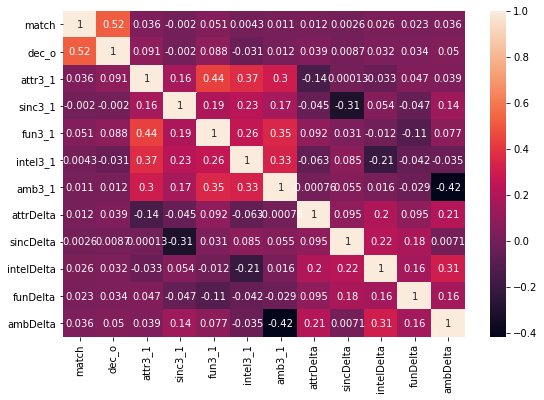

In [33]:
# Add columns with delta
for i in list_attributes: 
    new_column = str(i+'Delta')
    perceptions[new_column] = perceptions[str(i+'5_1')] - perceptions[str(i+'3_1')]  


corr = perceptions.iloc[:,np.r_[2,3,4:9,44:49]].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, ax=ax)

# WRITE FINAL CONCLUSIONS